In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


random_seed = np.random.RandomState(12)

In [16]:
X_train = 0.5 * random_seed.randn(500 , 2)
X_train = np.r_[ X_train + 3 , X_train ]
X_train = pd.DataFrame (X_train , columns=["x" , "y"])

X_train.shape

(1000, 2)

In [17]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

X_train.shape

(1000, 2)

In [18]:
X_outliers = random_seed.uniform(low=(-5), high=5, size=(50 , 2))
X_outliers = pd.DataFrame (X_outliers, columns=["x" , "y" ] )

X_outliers.shape

(50, 2)

In [19]:
X_outliers.to_csv('outliers.csv')
X_test.to_csv('test.csv')
X_train.to_csv('train.csv')

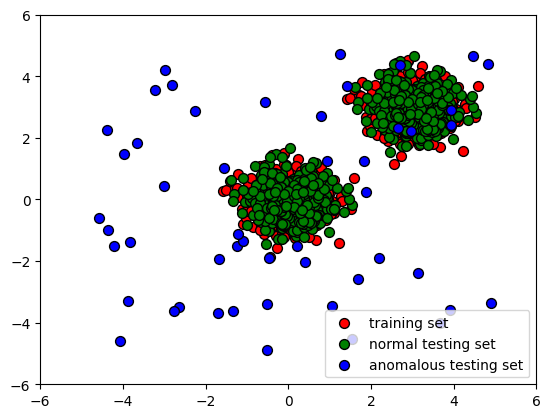

In [20]:
p1 = plt.scatter(X_train.x, X_train.y, c="red", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()

In [21]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

## Obtain the output for outlier, in terms of values of x, y and prediction

In [22]:
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


## Write appropriate commands to plot the Isolation Forest predictions on the outliers. Check how many it caught. Plot the graph to show how many it caught.

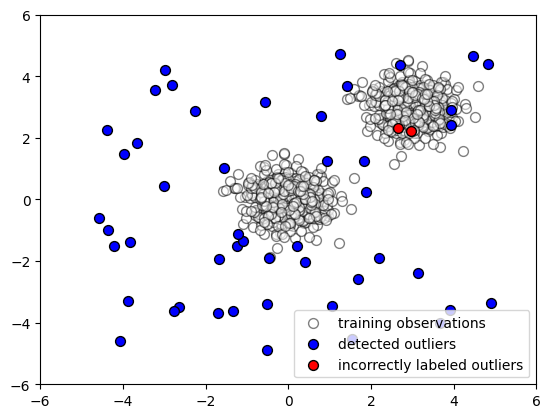

In [23]:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black", alpha=0.5)
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

## Obtain the output for test data, in terms of values of x, y and prediction

In [24]:
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


## Next, plot the results to see whether the classifier labeled the normal testing data correctly

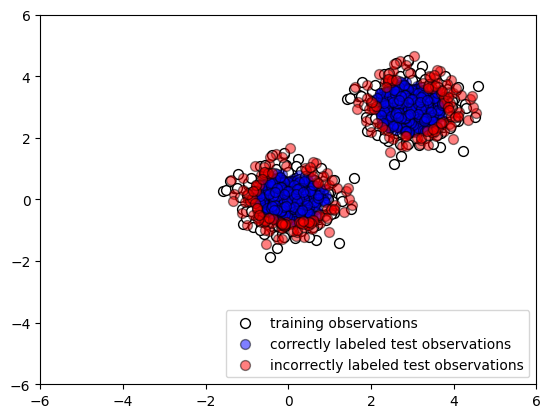

In [25]:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.pred == 1, ["x"]],
    X_test.loc[X_test.pred == 1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
    alpha = 0.5
)
p3 = plt.scatter(
    X_test.loc[X_test.pred == -1, ["x"]],
    X_test.loc[X_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
    alpha = 0.5
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training observations",
        "correctly labeled test observations",
        "incorrectly labeled test observations",
    ],
    loc="lower right",
)

plt.show()

In [26]:
print("Train Accuracy:", list(y_pred_train).count(-1)/y_pred_train.shape[0])

Train Accuracy: 0.242


In [27]:
print("Test Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

Test Accuracy: 0.783


In [28]:
print("Outlier Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Outlier Accuracy: 0.96
